In [5]:

# If you run into permission issues, try with the --user option
import sys
#!pip install -q rdflib networkx matplotlib
#!{sys.executable} -m pip install rdflib networkx matplotlib --user
#1!pip install rdflib
# Imports
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections

# RDF graph loading
path = input("Path or URI of the RDF graph to load: ")
#path="https://raw.githubusercontent.com/albertmeronyo/lodapi/master/ghostbusters.ttl"
rg = RDFGraph()
rg.parse(path, format='ttl')
print("rdflib Graph loaded successfully with {} triples".format(len(rg)))



G = rdflib_to_networkx_graph(rg)
print("networkx Graph loaded successfully with length {}".format(len(G)))




Path or URI of the RDF graph to load: hda_ontology_0.1.ttl
rdflib Graph loaded successfully with 296 triples
networkx Graph loaded successfully with length 160


In [32]:
#for i,j in enumerate(rg):
 #   print(i,j)

In [16]:
#print(rg)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']].


In [17]:

print(G.nodes())
print(G.edges())

print(type(G.nodes()))
print(type(G.edges()))

[rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#sousDomainePrimaire'), rdflib.term.Literal('sous-domaine primaire notice', lang='fr'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#normalizedLabel'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Tag'), rdflib.term.BNode('ub1bL123C14'), rdflib.term.URIRef('http://rdf.insee.fr/def/geo#nom'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#numeroRegion'), rdflib.term.Literal('code région ville', lang='fr'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Domaine'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#BaseDomaine'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1'), rdflib.term.Literal('Version 0.1 2014/09/19'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#numeroDepartement'), rdflib.term.Literal('code département ville', lang='fr'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#wikipediaURL'),

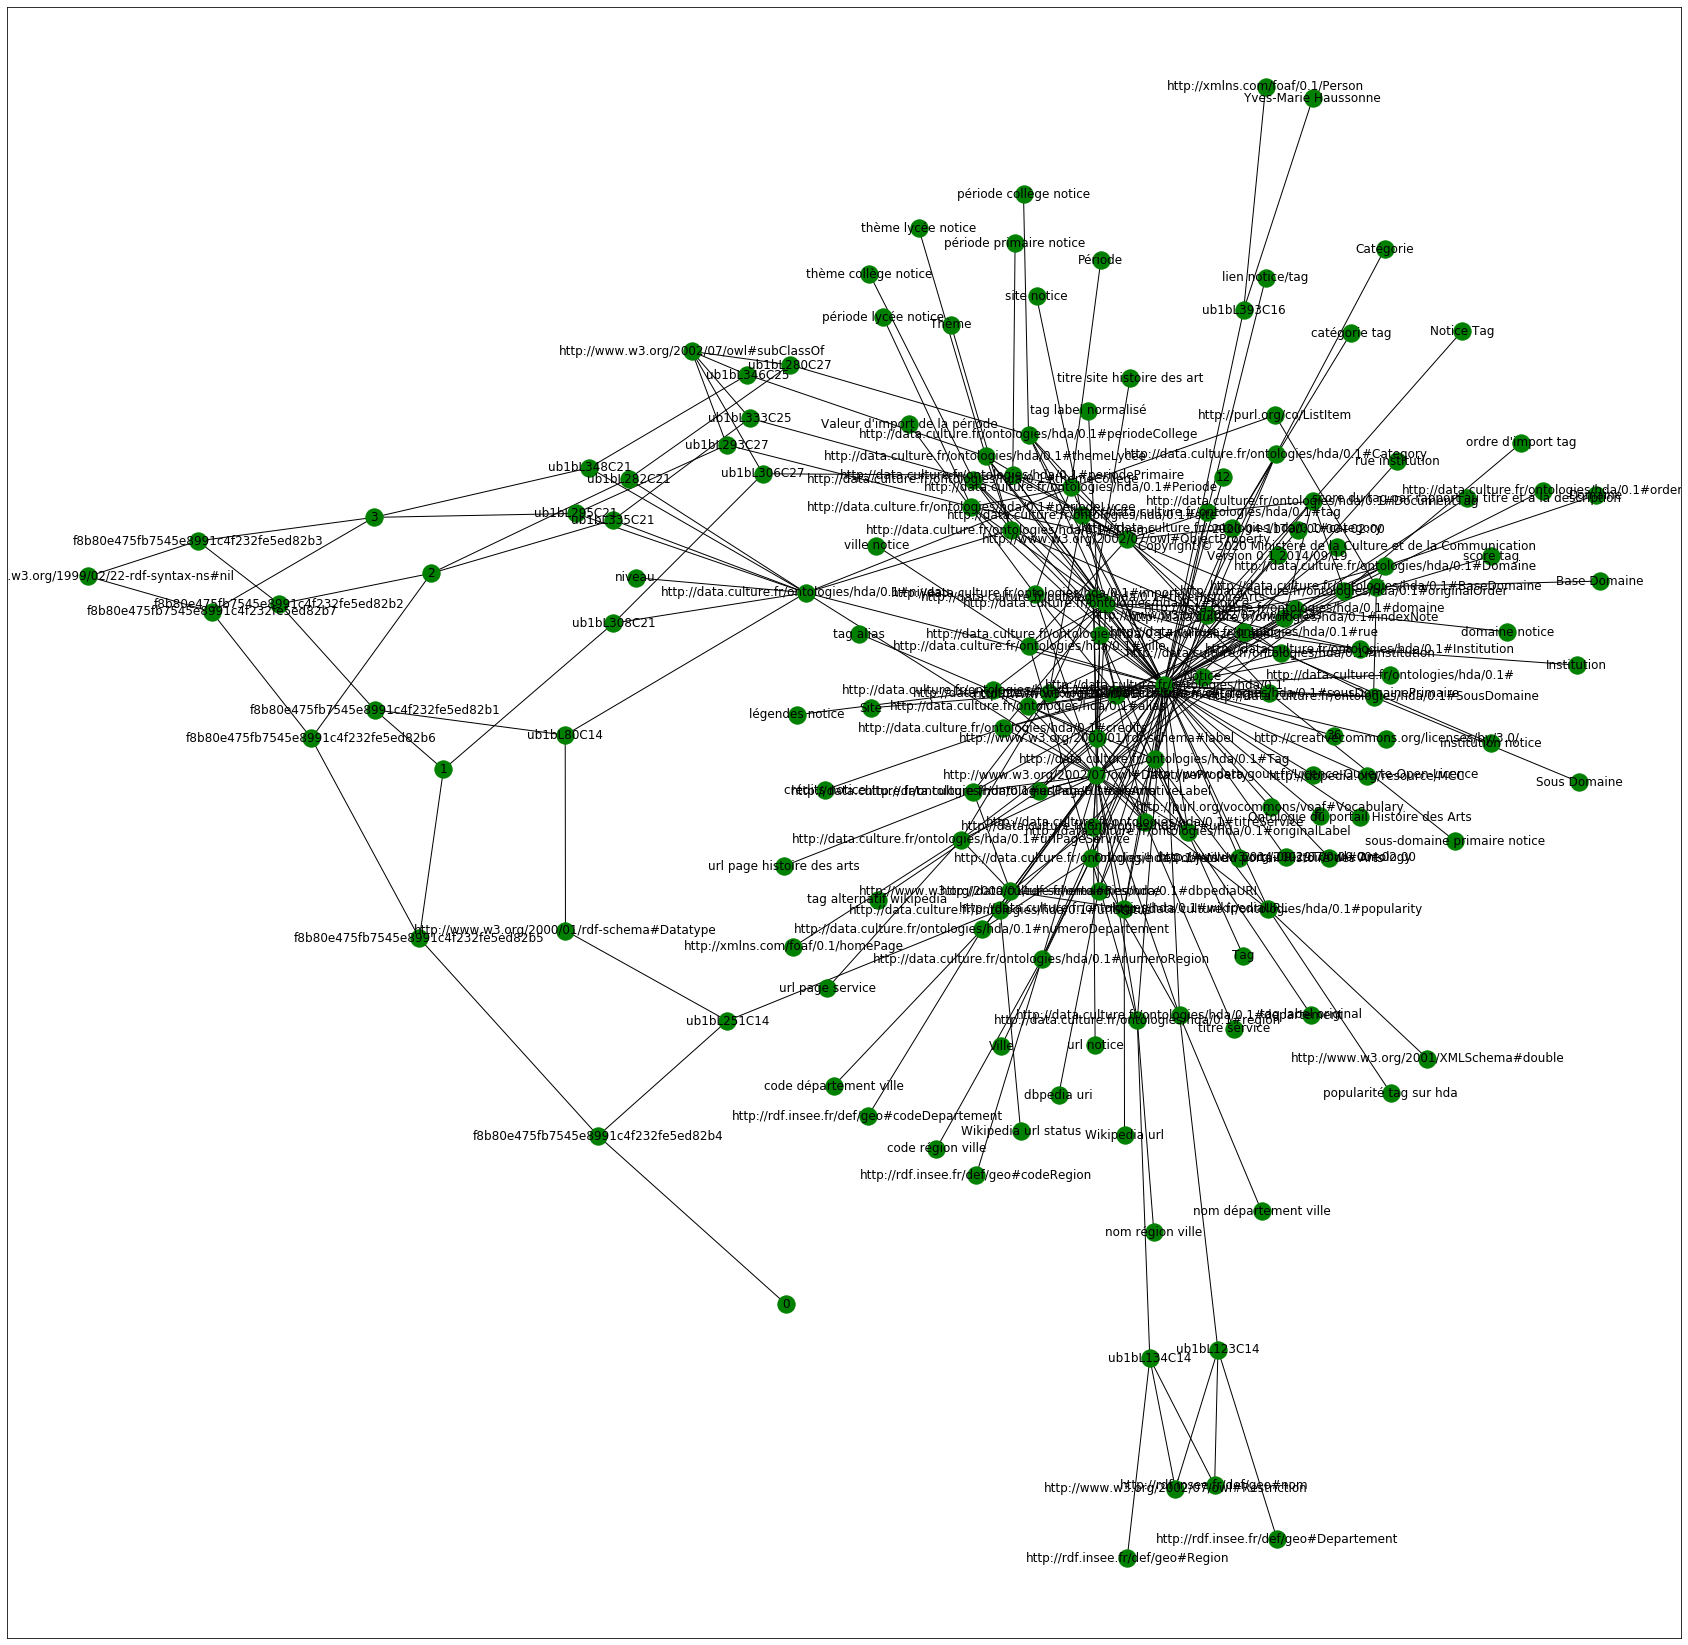

In [30]:
plt.figure(figsize =(30, 30)) 
nx.draw_networkx(G, with_label = True, node_color ='green') 


NETWORK SIZE
The network has 160 nodes and 296 edges

PENDANTS
The network has 74 pendants ie leaf nodes are

160
DEGREE CENTRALITY
The mean degree centrality is 0.023270440251572454, with stdev 0.03629626192456395
The maximum node is http://data.culture.fr/ontologies/hda/0.1, with value 0.4025157232704403
The minimum node is url page histoire des arts, with value 0.006289308176100629
(0.4025157232704403, 0.15094339622641512, 0.10062893081761007, 0.08176100628930819, 0.07547169811320756, 0.06918238993710692, 0.05660377358490566, 0.050314465408805034, 0.03773584905660378, 0.031446540880503145, 0.025157232704402517, 0.01886792452830189, 0.012578616352201259, 0.006289308176100629)
(1, 1, 1, 1, 2, 2, 1, 2, 17, 27, 5, 21, 5, 74)


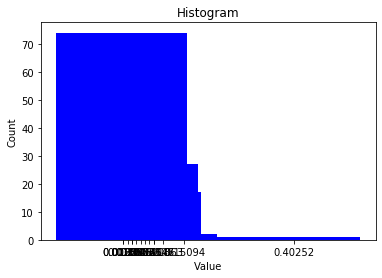

In [19]:
# Analysis
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)
def number_of_pendants(g):
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants
def histogram(l):
    degree_sequence = sorted([d for n, d in list(l.items())], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    print(deg)
    print(cnt)
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.3, color='b')
    plt.title("Histogram")
    plt.ylabel("Count")
    plt.xlabel("Value")
    ax.set_xticks([round(d,2) for d in deg])
    deg=[round(d,5) for d in deg]
    ax.set_xticklabels(deg)
    plt.show()
    return cnt
# Network size
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()

# Network size
print("PENDANTS")
print("============")
print("The network has {} pendants ie leaf nodes are".format(number_of_pendants(G)))
print()

# Degree centrality -- mean and stdev
dc = nx.degree_centrality(G)
degrees = []
nodes=[]
for k,v in dc.items():
    degrees.append(v)
    nodes.append(k)
print(len(dc.items()))    
print("DEGREE CENTRALITY")
print("=================")
print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(dc, key=dc.get), max(dc.values())))
print("The minimum node is {}, with value {}".format(min(dc, key=dc.get), min(dc.values())))
cnt=histogram(dc)
print()


In [6]:
from networkx.algorithms import community
import networkx as nx

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
p=sorted(map(sorted, next_level_communities))
print(p)

[[rdflib.term.BNode('ffd0154190e244ed29f13db025768da91b1'), rdflib.term.BNode('ffd0154190e244ed29f13db025768da91b2'), rdflib.term.BNode('ffd0154190e244ed29f13db025768da91b3'), rdflib.term.BNode('ffd0154190e244ed29f13db025768da91b4'), rdflib.term.BNode('ffd0154190e244ed29f13db025768da91b5'), rdflib.term.BNode('ffd0154190e244ed29f13db025768da91b6'), rdflib.term.BNode('ffd0154190e244ed29f13db025768da91b7'), rdflib.term.BNode('ub1bL251C14'), rdflib.term.BNode('ub1bL280C27'), rdflib.term.BNode('ub1bL282C21'), rdflib.term.BNode('ub1bL293C27'), rdflib.term.BNode('ub1bL295C21'), rdflib.term.BNode('ub1bL306C27'), rdflib.term.BNode('ub1bL308C21'), rdflib.term.BNode('ub1bL333C25'), rdflib.term.BNode('ub1bL335C21'), rdflib.term.BNode('ub1bL346C25'), rdflib.term.BNode('ub1bL348C21'), rdflib.term.BNode('ub1bL80C14'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#niveau'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#nil'), rdflib.term.URIRef('http://www.w3.org/2000/

In [23]:
o = nx.algorithms.max_weight_matching(G, p,True)
print('Number of edges in matching: {}'.format(len(o)))
op=sorted(map(sorted, o))
#print(op)

Number of edges in matching: 65
[[rdflib.term.BNode('f49d5b6ce7a294bf3beca59fcece4d399b1'), rdflib.term.BNode('ub2bL80C14')], [rdflib.term.BNode('f49d5b6ce7a294bf3beca59fcece4d399b2'), rdflib.term.BNode('f49d5b6ce7a294bf3beca59fcece4d399b3')], [rdflib.term.BNode('f49d5b6ce7a294bf3beca59fcece4d399b4'), rdflib.term.Literal('0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))], [rdflib.term.BNode('f49d5b6ce7a294bf3beca59fcece4d399b5'), rdflib.term.Literal('1', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))], [rdflib.term.BNode('f49d5b6ce7a294bf3beca59fcece4d399b6'), rdflib.term.Literal('2', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))], [rdflib.term.BNode('f49d5b6ce7a294bf3beca59fcece4d399b7'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#nil')], [rdflib.term.BNode('ub2bL123C14'), rdflib.term.URIRef('http://rdf.insee.fr/def/geo#Departement')], [rdflib.term.BNode('ub2bL134C14'), rdflib.term.URI

In [ ]:
#enter the number of partitions u want for the data let say we require total 16 partitions 
'''
let n ne the number of partitions
new_partition_1[0 for i in range(len(op)//n)]
new_partition_2=[0 for i in range(len(op)//n)]
...
new_partition_n=[[0 for i in range(len(op)//n)]]
for i in range(len(op)):
    new_partition1.insert(op[i])
    new_partition2.insert(op[i+1])
    .
    .
    .
    new_partitionn.insert(op[i+n-1])
    
    

In [19]:
l=[]
for i in o:
    print(i)
    l.append(i)

(rdflib.term.Literal('code département ville', lang='fr'), rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#numeroDepartement'))
None
code département ville http://data.culture.fr/ontologies/hda/0.1#numeroDepartement
(rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#institution'), rdflib.term.Literal('institution notice', lang='fr'))
None
http://data.culture.fr/ontologies/hda/0.1#institution institution notice
(rdflib.term.URIRef('http://rdf.insee.fr/def/geo#Region'), rdflib.term.BNode('ub1bL134C14'))
None
http://rdf.insee.fr/def/geo#Region ub1bL134C14
(rdflib.term.BNode('ub1bL393C16'), rdflib.term.Literal('Yves-Marie Haussonne'))
None
ub1bL393C16 Yves-Marie Haussonne
(rdflib.term.BNode('ub1bL308C21'), rdflib.term.BNode('ub1bL306C27'))
None
ub1bL308C21 ub1bL306C27
(rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#numeroRegion'), rdflib.term.URIRef('http://rdf.insee.fr/def/geo#codeRegion'))
None
http://data.culture.fr/ontologies/hda/0.1#numeroRegio

In [52]:
#list of nodes of graph
'''m=[rdflib.term.BNode('fb0fdc76c16744e24a8d6c117bd846397b1'),
  rdflib.term.BNode('fb0fdc76c16744e24a8d6c117bd846397b2'),
  rdflib.term.BNode('fb0fdc76c16744e24a8d6c117bd846397b3'),
  rdflib.term.BNode('fb0fdc76c16744e24a8d6c117bd846397b4'),
  rdflib.term.BNode('fb0fdc76c16744e24a8d6c117bd846397b5'),
  rdflib.term.BNode('fb0fdc76c16744e24a8d6c117bd846397b6'),
  rdflib.term.BNode('fb0fdc76c16744e24a8d6c117bd846397b7'),
  rdflib.term.BNode('ub6bL251C14'),
  rdflib.term.BNode('ub6bL280C27'),
  rdflib.term.BNode('ub6bL282C21'),
  rdflib.term.BNode('ub6bL293C27'),
  rdflib.term.BNode('ub6bL295C21'),
  rdflib.term.BNode('ub6bL306C27'),
  rdflib.term.BNode('ub6bL308C21'),
  rdflib.term.BNode('ub6bL333C25'),
  rdflib.term.BNode('ub6bL335C21'),
  rdflib.term.BNode('ub6bL346C25'),
  rdflib.term.BNode('ub6bL348C21'),
  rdflib.term.BNode('ub6bL80C14'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#niveau'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#nil'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Datatype'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#subClassOf'),
  rdflib.term.Literal('0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('1', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('2', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('3', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('niveau', lang='fr'),
 rdflib.term.BNode('ub6bL123C14'),
  rdflib.term.BNode('ub6bL134C14'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#departement'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#region'),
  rdflib.term.URIRef('http://rdf.insee.fr/def/geo#Departement'),
  rdflib.term.URIRef('http://rdf.insee.fr/def/geo#Region'),
  rdflib.term.URIRef('http://rdf.insee.fr/def/geo#nom'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Restriction'),
  rdflib.term.Literal('nom département ville', lang='fr'),
  rdflib.term.Literal('nom région ville', lang='fr'),
 rdflib.term.BNode('ub6bL393C16'),
  rdflib.term.URIRef('http://creativecommons.org/licenses/by/3.0/'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#BaseDomaine'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Category'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#DocumentTag'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Domaine'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Institution'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Notice'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Periode'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Site'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#SousDomaine'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Tag'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Theme'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#Ville'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#alias'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#alternativeLabel'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#category'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#credits'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#dbpediaURI'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#domaine'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#import'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#indexNote'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#institution'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#legendes'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#normalizedLabel'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#numeroDepartement'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#numeroRegion'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#order'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#originalLabel'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#originalOrder'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#periodeCollege'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#periodeLycee'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#periodePrimaire'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#popularity'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#rue'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#site'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#sousDomainePrimaire'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#tag'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#themeCollege'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#themeLycee'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#titreHistoireArts'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#titreService'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#url'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#urlPageHistoireArts'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#urlPageService'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#urlStatus'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#ville'),
  rdflib.term.URIRef('http://data.culture.fr/ontologies/hda/0.1#wikipediaURL'),
  rdflib.term.URIRef('http://dbpedia.org/resource/MCC'),
  rdflib.term.URIRef('http://purl.org/co/ListItem'),
  rdflib.term.URIRef('http://purl.org/vocommons/voaf#Vocabulary'),
  rdflib.term.URIRef('http://rdf.insee.fr/def/geo#codeDepartement'),
  rdflib.term.URIRef('http://rdf.insee.fr/def/geo#codeRegion'),
  rdflib.term.URIRef('http://www.data.gouv.fr/Licence-Ouverte-Open-Licence'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Literal'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Resource'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#DatatypeProperty'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Ontology'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'),
  rdflib.term.URIRef('http://xmlns.com/foaf/0.1/homePage'),
  rdflib.term.Literal('2014-09-19T00:00:00+02:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')),
  rdflib.term.Literal('2020-04-11T00:00:00+02:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')),
  rdflib.term.Literal('12', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('36', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('Version 0.1 2014/09/19'),
  rdflib.term.Literal('Yves-Marie Haussonne'),
  rdflib.term.Literal('fr'),
  rdflib.term.Literal('Base Domaine', lang='fr'),
  rdflib.term.Literal('Catégorie', lang='fr'),
  rdflib.term.Literal('Copyright © 2020 Ministère de la Culture et de la Communication', lang='fr'),
  rdflib.term.Literal('Domaine', lang='fr'),
  rdflib.term.Literal('Institution', lang='fr'),
  rdflib.term.Literal('Notice', lang='fr'),
  rdflib.term.Literal('Notice Tag', lang='fr'),
  rdflib.term.Literal('Ontologie des objets du portail Histoire des Arts', lang='fr'),
  rdflib.term.Literal('Ontologie du portail Histoire des Arts', lang='fr'),
  rdflib.term.Literal('Période', lang='fr'),
  rdflib.term.Literal('Site', lang='fr'),
  rdflib.term.Literal('Sous Domaine', lang='fr'),
  rdflib.term.Literal('Tag', lang='fr'),
  rdflib.term.Literal('Thème', lang='fr'),
  rdflib.term.Literal("Valeur d'import de la période", lang='fr'),
  rdflib.term.Literal('Ville', lang='fr'),
  rdflib.term.Literal('Wikipedia url', lang='fr'),
  rdflib.term.Literal('Wikipedia url status', lang='fr'),
  rdflib.term.Literal('catégorie tag', lang='fr'),
  rdflib.term.Literal('code département ville', lang='fr'),
  rdflib.term.Literal('code région ville', lang='fr'),
  rdflib.term.Literal('crédits notice', lang='fr'),
  rdflib.term.Literal('dbpedia uri', lang='fr'),
  rdflib.term.Literal('domaine notice', lang='fr'),
  rdflib.term.Literal('institution notice', lang='fr'),
  rdflib.term.Literal('lien notice/tag', lang='fr'),
  rdflib.term.Literal('légendes notice', lang='fr'),
  rdflib.term.Literal("ordre d'import tag", lang='fr'),
  rdflib.term.Literal('popularité tag sur hda', lang='fr'),
  rdflib.term.Literal('période collège notice', lang='fr'),
  rdflib.term.Literal('période lycée notice', lang='fr'),
  rdflib.term.Literal('période primaire notice', lang='fr'),
  rdflib.term.Literal('rue institution', lang='fr'),
  rdflib.term.Literal('score du tag par rapport au titre et à la description', lang='fr'),
  rdflib.term.Literal('score tag', lang='fr'),
  rdflib.term.Literal('site notice', lang='fr'),
  rdflib.term.Literal('sous-domaine primaire notice', lang='fr'),
  rdflib.term.Literal('tag alias', lang='fr'),
  rdflib.term.Literal('tag alternatif wikipedia', lang='fr'),
  rdflib.term.Literal('tag label normalisé', lang='fr'),
  rdflib.term.Literal('tag label original', lang='fr'),
  rdflib.term.Literal('thème collège notice', lang='fr'),
  rdflib.term.Literal('thème lycée notice', lang='fr'),
  rdflib.term.Literal('titre service', lang='fr'),
  rdflib.term.Literal('titre site histoire des art', lang='fr'),
  rdflib.term.Literal('url notice', lang='fr'),
  rdflib.term.Literal('url page histoire des arts', lang='fr'),
  rdflib.term.Literal('url page service', lang='fr'),
  rdflib.term.Literal('ville notice', lang='fr')]'''

'm=[rdflib.term.BNode(\'fb0fdc76c16744e24a8d6c117bd846397b1\'),\n  rdflib.term.BNode(\'fb0fdc76c16744e24a8d6c117bd846397b2\'),\n  rdflib.term.BNode(\'fb0fdc76c16744e24a8d6c117bd846397b3\'),\n  rdflib.term.BNode(\'fb0fdc76c16744e24a8d6c117bd846397b4\'),\n  rdflib.term.BNode(\'fb0fdc76c16744e24a8d6c117bd846397b5\'),\n  rdflib.term.BNode(\'fb0fdc76c16744e24a8d6c117bd846397b6\'),\n  rdflib.term.BNode(\'fb0fdc76c16744e24a8d6c117bd846397b7\'),\n  rdflib.term.BNode(\'ub6bL251C14\'),\n  rdflib.term.BNode(\'ub6bL280C27\'),\n  rdflib.term.BNode(\'ub6bL282C21\'),\n  rdflib.term.BNode(\'ub6bL293C27\'),\n  rdflib.term.BNode(\'ub6bL295C21\'),\n  rdflib.term.BNode(\'ub6bL306C27\'),\n  rdflib.term.BNode(\'ub6bL308C21\'),\n  rdflib.term.BNode(\'ub6bL333C25\'),\n  rdflib.term.BNode(\'ub6bL335C21\'),\n  rdflib.term.BNode(\'ub6bL346C25\'),\n  rdflib.term.BNode(\'ub6bL348C21\'),\n  rdflib.term.BNode(\'ub6bL80C14\'),\n  rdflib.term.URIRef(\'http://data.culture.fr/ontologies/hda/0.1#niveau\'),\n  rdflib.term

In [50]:
cl = nx.clustering(G)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
su=0
for i,c in enumerate(cl):
    print(i,c)
    print("Cluster {} has {} nodes".format(i,len(c)))
print()

CLUSTERS
The graph has 160 clusters
0 http://data.culture.fr/ontologies/hda/0.1#sousDomainePrimaire
Cluster 0 has 61 nodes
1 sous-domaine primaire notice
Cluster 1 has 28 nodes
2 http://data.culture.fr/ontologies/hda/0.1#normalizedLabel
Cluster 2 has 57 nodes
3 http://data.culture.fr/ontologies/hda/0.1#Tag
Cluster 3 has 45 nodes
4 ub1bL123C14
Cluster 4 has 11 nodes
5 http://rdf.insee.fr/def/geo#nom
Cluster 5 has 31 nodes
6 http://data.culture.fr/ontologies/hda/0.1#numeroRegion
Cluster 6 has 54 nodes
7 code région ville
Cluster 7 has 17 nodes
8 http://data.culture.fr/ontologies/hda/0.1#Domaine
Cluster 8 has 49 nodes
9 http://data.culture.fr/ontologies/hda/0.1#BaseDomaine
Cluster 9 has 53 nodes
10 http://data.culture.fr/ontologies/hda/0.1
Cluster 10 has 41 nodes
11 Version 0.1 2014/09/19
Cluster 11 has 22 nodes
12 http://data.culture.fr/ontologies/hda/0.1#numeroDepartement
Cluster 12 has 59 nodes
13 code département ville
Cluster 13 has 22 nodes
14 http://data.culture.fr/ontologies/hda/0

In [12]:
os=nx.algorithms.community.label_propagation.label_propagation_communities(G)

In [13]:
j=0
label_partitions=[]
#j is the length of o 
for i in os:
    j+=1
    print(len(i))
    label_partitions.append(len(i))


6
3
3
3
11
123
8
3


In [27]:
print(label_partitions)
print(cnt)
#no of elements in each partitioning is 4 edges so 16 partitons can be obtained form max weight matching
max_weight=[4 for i in range(len(o)//4)]
print(max_weight)

[6, 3, 3, 3, 11, 123, 8, 3]
(1, 1, 1, 1, 2, 2, 1, 2, 17, 27, 5, 21, 5, 74)
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


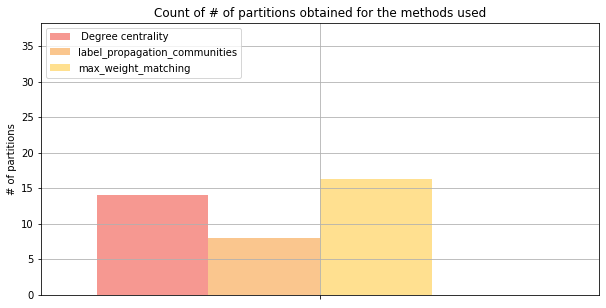

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
#df=pd.read_excel('finalreport.xlsx')
l1=[" Degree centrality ","label_propagation_communities","max_weight_matching"]
l2=[len(cnt),len(label_partitions),len(o)/4]
lskewness=['YES','YES',"NO"]
width = 1.5
pos = [0]
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, l2[0], width, alpha=0.5, color='#EE3224',label=l1[0]) 
plt.bar([p + width for p in pos], l2[1],width, alpha=0.5, color='#F78F1E', label=l1[1]) 
plt.bar([p + width*2 for p in pos],l2[2],  width, alpha=0.5,color='#FFC222',label=l1[2]) 
ax.set_ylabel('# of partitions')
ax.set_title('Count of # of partitions obtained for the methods used')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels("")
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, l2[0] +l2[1] +l2[2] ])
# Adding the legend and showing the plot
plt.legend([l1[0],l1[1],l1[2]], loc='upper left')
plt.grid()
plt.show()

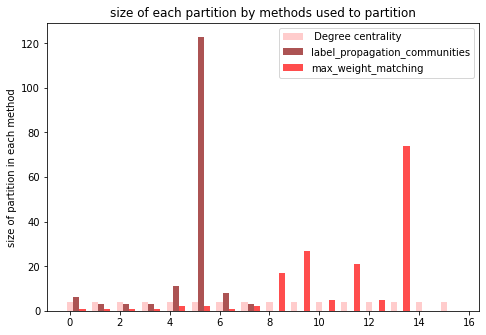

In [51]:
import numpy as np
import matplotlib.pyplot as plt
#As the number of partition are not the same for all the above methods we append 0 for such lists.
data =[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],[6, 3, 3, 3, 11, 123, 8, 3,0,0,0,0,0,0,0,0],[1, 1, 1, 1, 2, 2, 1, 2, 17, 27, 5, 21, 5, 74,0,0]]
X = np.arange(16)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#ffcccc', width = 0.25)
ax.bar(X + 0.25, data[1], color = '#ac5353', width = 0.25)
ax.bar(X + 0.50, data[2], color = '#ff4d4d', width = 0.25)
ax.set_ylabel('size of partition in each method')
ax.set_title('size of each partition by methods used to partition')
ax.legend(labels=l1)
plt.show()

In [ ]:
# from the above figure we can interpret that max_weight_matching does not have skewness as the number of nodes 